In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
%load_ext autoreload
%autoreload 2

In [21]:
DEVICE = 'cuda:0'
zdim = 20

In [22]:
def model(params, sigma = .1):
    z = np.array(list(params.values()))
    z = z * np.pi
    x = np.sin(z)**2
    return dict(x=x)

In [23]:
def noise(obs, params, sigma = 0.1):
    x = obs['x']
    x = x + np.random.randn(*x.shape) * sigma
    return dict(x=x)

In [24]:
params = ["z"+str(i) for i in range(zdim)]
par0 = {k: 0.25 for k in params}
obs0 = noise(model(par0), par0)

In [25]:
cache = swyft.MemoryCache(params, obs_shapes = dict(x=(zdim,)))
prior_conf = {k: ["uniform", 0., 1.] for k in params}
prior = swyft.Prior(prior_conf)

Creating new cache.


In [27]:
s = swyft.SWYFT(model, noise, prior, cache, obs0, device = DEVICE)
s.infer2d(N = 10000, params = ['z0', 'z1'])

Simulate:   0%|          | 0/7055 [00:00<?, ?it/s]

N = 10000
Round: 1
Adding 7055 new samples. Run simulator!


Simulate: 100%|██████████| 7055/7055 [00:52<00:00, 134.00it/s]


n_features = 20
Start training
LR iteration 0
Validation loss: 194.39002843056954
Validation loss: 149.96658817414314
Validation loss: 135.9366218813004
Validation loss: 126.4744644165039
Validation loss: 122.28060273201235
Validation loss: 118.22360623267389
Validation loss: 116.59334785707536
Validation loss: 115.76239432058027
Validation loss: 114.64400334512034
Validation loss: 113.5248297414472
Total epochs: 10
LR iteration 1
Validation loss: 105.06534182640814
Validation loss: 105.34500343568864
Total epochs: 2
LR iteration 2
Validation loss: 102.64182527603641
Validation loss: 102.62667477515436
Validation loss: 101.92923958070817
Validation loss: 102.36967394428868
Total epochs: 4


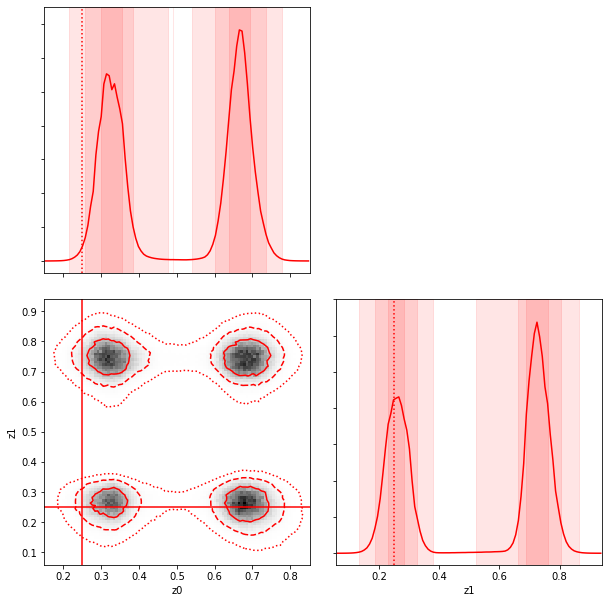

In [28]:
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["z0", "z1"], color='r', figsize = (10,10), truth=par0)